# Problem set 4: Analyzing data

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/exercises-2020/master?urlpath=lab/tree/PS4/problem_set_4.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [2]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [3]:
nah1 = dst.get_data(table_id = 'NAH1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [4]:
nah1.rename(columns = columns_dict,inplace=True)

for key,value in var_dict.items():
    nah1.variable.replace({key:value},inplace=True)

for key,value in unit_dict.items():
    nah1.unit.replace({key:value},inplace=True)

In [5]:
nah1

,variable,unit,year,value
0,D.21 Taxes on products,real,1966,98704
1,D.21 Taxes on products,nominal,1966,10260
2,D.21-D.31 Taxes less subsidies on products,real,1966,97473
3,D.21-D.31 Taxes less subsidies on products,nominal,1966,8860
4,D.31 Subsidies on products,real,1966,4458
...,...,...,...,...
3295,P.72 Import of services,nominal,2020,443261
3296,Supply for final demand,real,2020,4887153
3297,Supply for final demand,nominal,2020,5339680
3298,Uses,real,2020,4887153


**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [6]:
# write you code here
print(var_dict.values())
I = nah1.variable.isin(var_dict.values())

nah1 = nah1.loc[I,:].copy()

nah1.value = nah1.value.astype('float')

dict_values(['Y', 'C', 'G', 'I', 'X', 'M'])


**Step 4:** Discuss what the following summary statistics show.

In [7]:
nah1.groupby(['variable','unit']).describe()

year                                                    \
                 count    mean       std     min     25%     50%     75%   
variable unit                                                              
C        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
G        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
I        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
M        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
X        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
Y        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2020.0  55.0  7.683908e+05  5.040018e+05    62576.0   
         real     2020.0  55.0  1.049783e+06  2.736839e+05   549491.0   
G        nominal  2020.0  55.0  2.607085e+05  1.796658e+05    14768.0   
         real     2020.0  55.0  3.684251e+05  1.019986e+05   171307.0   
I        nominal  2020.0  55.0  2.242136e+05  1.545024e+05    21134.0   
         real     2020.0  55.0  2.739378e+05  1.065895e+05   127630.0   
M        nominal  2020.0  55.0  4.310717e+05  3.591525e+05    24406.0   
         real     2020.0  55.0  4.773157e+05  3.125393e+05   112171.0   
X        nominal  2020.0  55.0  4.842998e+05  4.097065e+05    23110.0   
         real     2020.0  55.0  5.568367e+05  3.544354e+05   123594.0   
Y        nominal  2020.0  55.0  1.779916e+06  1.240433e+06   144582.0   
         real     2020.0  55.0  2.309483e+06  8.066060e+05  1089347.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   307716.0   697228.0  1226782.0  1633099.0  
         real      847023.0   989510.0  1329971.0  1509810.0  
G        nominal    98758.5   234912.0   415183.0   576641.0  
         real      305338.5   348366.0   455784.5   527144.0  
I        nominal    78842.0   177942.0   340460.0   541818.0  
         real      182933.5   233339.0   350645.0   488200.0  
M        nominal   124567.5   280203.0   759341.0  1190178.0  
         real      212508.5   325555.0   787026.0  1112570.0  
X        nominal   119256.5   341094.0   832494.5  1361803.0  
         real      238791.0   438932.0   899098.0  1274381.0  
Y        nominal   645647.0  1503349.0  2963431.5  4084222.0  
         real     1604722.0  2108104.0  3117423.5  3718258.0

**Answer:**

In [8]:
# a. load
nah1_true = dst.get_data(table_id = 'NAH1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})

# b. rename and replace
nah1_true.rename(columns=columns_dict,inplace=True)

# c. replace data
for key,value in var_dict.items():
   nah1_true.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
   nah1_true.unit.replace(key,value,inplace=True)

# d. keep if in var_dict
I = False
for key,value in var_dict.items():
    I = I | (nah1_true.variable == value)
nah1_true = nah1_true[I]
   
# e. convert values to numeric
nah1_true.value = nah1_true.value.astype('float')

# d. summary statistics
nah1_true.groupby(['variable','unit']).describe()

year                                                    \
                 count    mean       std     min     25%     50%     75%   
variable unit                                                              
C        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
G        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
I        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
M        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
X        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
Y        nominal  55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   
         real     55.0  1993.0  16.02082  1966.0  1979.5  1993.0  2006.5   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2020.0  55.0  7.683908e+05  5.040018e+05    62576.0   
         real     2020.0  55.0  1.049783e+06  2.736839e+05   549491.0   
G        nominal  2020.0  55.0  2.607085e+05  1.796658e+05    14768.0   
         real     2020.0  55.0  3.684251e+05  1.019986e+05   171307.0   
I        nominal  2020.0  55.0  2.242136e+05  1.545024e+05    21134.0   
         real     2020.0  55.0  2.739378e+05  1.065895e+05   127630.0   
M        nominal  2020.0  55.0  4.310717e+05  3.591525e+05    24406.0   
         real     2020.0  55.0  4.773157e+05  3.125393e+05   112171.0   
X        nominal  2020.0  55.0  4.842998e+05  4.097065e+05    23110.0   
         real     2020.0  55.0  5.568367e+05  3.544354e+05   123594.0   
Y        nominal  2020.0  55.0  1.779916e+06  1.240433e+06   144582.0   
         real     2020.0  55.0  2.309483e+06  8.066060e+05  1089347.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   307716.0   697228.0  1226782.0  1633099.0  
         real      847023.0   989510.0  1329971.0  1509810.0  
G        nominal    98758.5   234912.0   415183.0   576641.0  
         real      305338.5   348366.0   455784.5   527144.0  
I        nominal    78842.0   177942.0   340460.0   541818.0  
         real      182933.5   233339.0   350645.0   488200.0  
M        nominal   124567.5   280203.0   759341.0  1190178.0  
         real      212508.5   325555.0   787026.0  1112570.0  
X        nominal   119256.5   341094.0   832494.5  1361803.0  
         real      238791.0   438932.0   899098.0  1274381.0  
Y        nominal   645647.0  1503349.0  2963431.5  4084222.0  
         real     1604722.0  2108104.0  3117423.5  3718258.0

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [9]:
pop = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']})
pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
I = pop.HOVEDDELE == 'All Denmark'
pop =  pop.loc[I,['year','population']]
pop.head()

,year,population
0,2010,5534738
8,1769,797584
9,1787,841806
10,1801,929001
11,1834,1230964


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [10]:
merged = pd.merge(nah1,pop,how='left',on=['year'])
merged.tail(10)

,variable,unit,year,value,population
650,C,real,2020,1478545.0,5822763.0
651,C,nominal,2020,1622387.0,5822763.0
652,G,real,2020,526444.0,5822763.0
653,G,nominal,2020,576641.0,5822763.0
654,I,real,2020,488200.0,5822763.0
655,I,nominal,2020,541818.0,5822763.0
656,X,real,2020,1165628.0,5822763.0
657,X,nominal,2020,1251652.0,5822763.0
658,M,real,2020,1050154.0,5822763.0
659,M,nominal,2020,1111427.0,5822763.0


**Answer:**


In [11]:
merged_true = pd.merge(nah1_true,pop,how='left',on=['year'])
merged_true.tail(10)

,variable,unit,year,value,population
650,C,real,2020,1478545.0,5822763.0
651,C,nominal,2020,1622387.0,5822763.0
652,G,real,2020,526444.0,5822763.0
653,G,nominal,2020,576641.0,5822763.0
654,I,real,2020,488200.0,5822763.0
655,I,nominal,2020,541818.0,5822763.0
656,X,real,2020,1165628.0,5822763.0
657,X,nominal,2020,1251652.0,5822763.0
658,M,real,2020,1050154.0,5822763.0
659,M,nominal,2020,1111427.0,5822763.0


**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [12]:
pop_with_index = pop.set_index('year')
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_with_index = merged.set_index('year')
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2020,C,real,1478545.0,5822763.0,5822763.0
2020,C,nominal,1622387.0,5822763.0,5822763.0
2020,G,real,526444.0,5822763.0,5822763.0
2020,G,nominal,576641.0,5822763.0,5822763.0
2020,I,real,488200.0,5822763.0,5822763.0
2020,I,nominal,541818.0,5822763.0,5822763.0
2020,X,real,1165628.0,5822763.0,5822763.0
2020,X,nominal,1251652.0,5822763.0,5822763.0
2020,M,real,1050154.0,5822763.0,5822763.0


**Answer:**

In [13]:
pop_with_index = pop.set_index('year')
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_true_with_index = merged_true.set_index('year')
merged_true_alt = merged_true_with_index.join(pop_with_index)
merged_true_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2020,C,real,1478545.0,5822763.0,5822763.0
2020,C,nominal,1622387.0,5822763.0,5822763.0
2020,G,real,526444.0,5822763.0,5822763.0
2020,G,nominal,576641.0,5822763.0,5822763.0
2020,I,real,488200.0,5822763.0,5822763.0
2020,I,nominal,541818.0,5822763.0,5822763.0
2020,X,real,1165628.0,5822763.0,5822763.0
2020,X,nominal,1251652.0,5822763.0,5822763.0
2020,M,real,1050154.0,5822763.0,5822763.0


## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

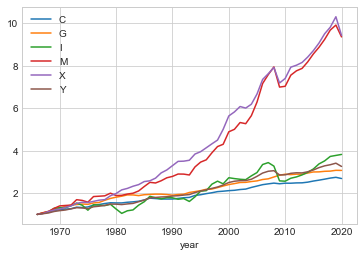

In [14]:
# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);
    
plot(nah1_true)

**Question** Implement the same split-apply-combine as above using `transform`.

In [24]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_alt = nah1.copy()
grouped = nah1_alt.groupby(['variable','unit'])['value']
nah1_alt['indexed'] = grouped.transform(lambda x: x/first(x))
nah1_alt.head()

,variable,unit,year,value,indexed
6,Y,real,1966,1089347.0,1.0
7,Y,nominal,1966,144582.0,1.0
22,C,real,1966,549491.0,1.0
23,C,nominal,1966,62576.0,1.0
24,G,real,1966,171307.0,1.0


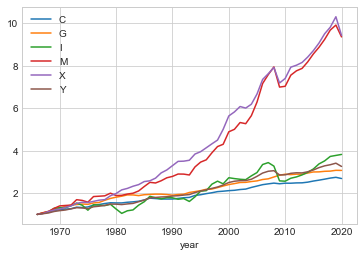

In [26]:
plot(nah1_alt)

**Answer:**

In [21]:
nah1_true_alt = nah1_true.copy()
grouped = nah1_true_alt.groupby(['variable','unit'])
nah1_true_alt['index_transform'] = grouped['value'].transform(lambda x: x/first(x))
nah1_true_alt.head()

,variable,unit,year,value,first,indexed,index_transform
0,Y,real,1966,1089347.0,1089347.0,1.0,1.0
1,Y,nominal,1966,144582.0,144582.0,1.0,1.0
2,C,real,1966,549491.0,549491.0,1.0,1.0
3,C,nominal,1966,62576.0,62576.0,1.0,1.0
4,G,real,1966,171307.0,171307.0,1.0,1.0


# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [35]:
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2018+1): 
    for k in range(1,4+1):
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict) 
# d. drop missing
prices = prices.dropna()
prices

,municipality,price19921,price19922,price19923,price19924,price19931,price19932,price19933,price19934,price19941,...,price20162,price20163,price20164,price20171,price20172,price20173,price20174,price20181,price20182,price20183
0,Hele landet,4021,4129,4000,3945,3851,4135,4296,4301,4333,...,12528.0,12670.0,12529.0,12647,13152,13160.0,13179.0,13416.0,13627,13640
1,Region Hovedstaden,5836,6008,5902,5649,5564,5796,6101,6108,6171,...,22664.0,22957.0,22933.0,23250,24048,24407.0,24364.0,24827.0,25119,25119
2,Landsdel København by,5658,5814,5858,5664,5381,5598,6001,5825,5869,...,30417.0,30541.0,30244.0,31142,32754,33567.0,33494.0,35001.0,34298,33695
3,København,5355,5451,5374,5171,5068,5186,5609,5519,5503,...,31159.0,32114.0,30752.0,32044,33937,34306.0,34013.0,36700.0,35442,34897
4,Frederiksberg,5183,5626,6980,6686,5537,7047,6651,6174,6558,...,44624.0,42008.0,42545.0,46969,43342,52597.0,53700.0,49189.0,50747,47793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Morsø,2706,2754,2702,2571,2607,2794,2791,2571,2694,...,5859.0,5523.0,5041.0,6157,5459,4898.0,5778.0,5015.0,4651,5154
111,Rebild,3040,2901,2845,2772,2710,2881,3066,3208,3093,...,8843.0,9783.0,8584.0,9358,9476,8160.0,9333.0,9202.0,9604,9501
112,Thisted,2750,2646,2597,2485,2874,2956,3038,3252,3074,...,6148.0,6676.0,6533.0,5906,6361,6285.0,7142.0,6185.0,6799,6663
113,Vesthimmerlands,2802,2587,2529,2730,2766,2764,2924,2964,3262,...,6453.0,6545.0,5622.0,6865,6326,6791.0,6756.0,6141.0,6391,5837


In [47]:

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)


# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')


# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)


prices_long

,municipality,year_quarter,price,d,date
0,Hele landet,19921,4021.0,1992Q1,1992-01-01
1,Region Hovedstaden,19921,5836.0,1992Q1,1992-01-01
2,Landsdel København by,19921,5658.0,1992Q1,1992-01-01
3,København,19921,5355.0,1992Q1,1992-01-01
4,Frederiksberg,19921,5183.0,1992Q1,1992-01-01
...,...,...,...,...,...
12300,Morsø,20183,5154.0,2018Q3,2018-07-01
12301,Rebild,20183,9501.0,2018Q3,2018-07-01
12302,Thisted,20183,6663.0,2018Q3,2018-07-01
12303,Vesthimmerlands,20183,5837.0,2018Q3,2018-07-01


In [76]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2018+1): 
    for k in range(1,4+1):
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)

# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [63]:
pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# b. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]

pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'},inplace=True)

# c. drop non-municipalities
#for val in ['Region', 'All ']: 
 #   I = pop['municipality'].str.contains(val)
    #pop.drop(pop[I].index, inplace=True)

I = pop['municipality'].str.contains('Region|All')
pop.drop(pop[I].index, inplace=True)


pop['date'] = pd.to_datetime(pop.TID)
del pop['TID']

pop

,municipality,population,date
0,Brøndby,35050,2015-01-01
1,Brøndby,34084,2012-01-01
2,Hvidovre,51270,2012-10-01
3,Gentofte,75365,2016-04-01
4,Brøndby,33856,2010-07-01
...,...,...,...
5560,Fredericia,51275,2021-01-01
5561,Hjørring,64155,2021-01-01
5562,Tønder,37050,2021-01-01
5563,Silkeborg,95488,2021-01-01


In [90]:
# a. load data
pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# b. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# c. drop non-municipalities
for val in ['Region', 'All ']: ## Accitdentially also drops Allerød 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

## Alternative with pop['municipality'].str.contains('Region|All ')
    
# d. convert to date
pop['date'] = pd.to_datetime(pop.TID)
del pop['TID']

pop.head()

,municipality,population,date
0,Brøndby,35050,2015-01-01
1,Brøndby,34084,2012-01-01
2,Hvidovre,51270,2012-10-01
3,Gentofte,75365,2016-04-01
4,Brøndby,33856,2010-07-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

In [112]:
data = pd.merge(pop, prices_long, how='left',on=['date','municipality'])
data.sort_values(['municipality','date'], inplace=True)
data[['l_pop','l_price']]= np.log(data[['population','price']])

grouped  = data.groupby(['municipality'])[['l_pop','l_price']].diff(1)
data[['l_pop_diff','l_price_diff']] = grouped

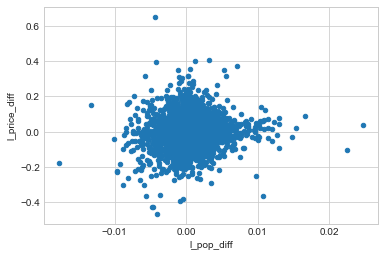

In [113]:
data.plot(x = 'l_pop_diff', y = 'l_price_diff', kind = 'scatter');

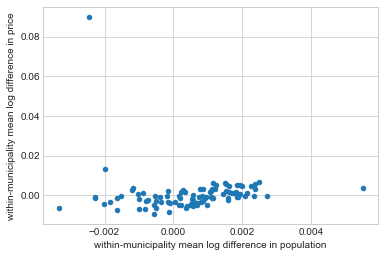

In [118]:
mean_diff = data.groupby('municipality')[['l_pop_diff','l_price_diff']].agg('mean')
ax = mean_diff.plot(x = 'l_pop_diff', y = 'l_price_diff', kind = 'scatter');
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in price'); 

**Answer:**

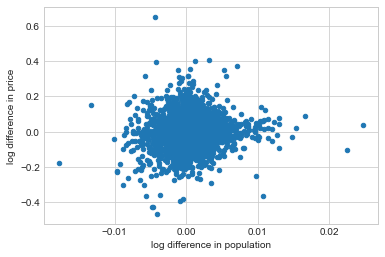

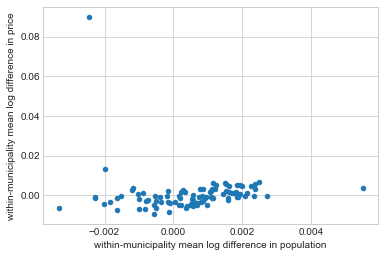

In [85]:
# a. merge
full = pd.merge(pop, prices_long, on=['date','municipality'], how='left')
full.sort_values(['municipality','date'], inplace=True)

# b. take logs
full['log_population'] =  np.log(full['population'])
full['log_price'] =  np.log(full['price'])

# c. figur 1: log differences
ax = full.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in price')

# c. figur 2: mean log differences
ax = full.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in price'); 